<a href="https://colab.research.google.com/github/rajasreekalli/Data-Visualization/blob/main/KMeans_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Imports
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
# Read the file

filename = '/content/cust_seg-2.csv'
df = pd.read_csv(filename)
df

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2
...,...,...,...,...,...,...,...,...,...,...
845,845,846,27,1,5,26,0.548,1.220,NaN,6.8
846,846,847,28,2,7,34,0.359,2.021,0.0,7.0
847,847,848,25,4,0,18,2.802,3.210,1.0,33.4
848,848,849,32,1,12,28,0.116,0.696,0.0,2.9


In [4]:
df.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [5]:
df = df.drop(columns=['Unnamed: 0', 'Customer Id'])

In [6]:
df.isnull().sum()

Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64

In [7]:
df['Defaulted'].value_counts()

0.0    517
1.0    183
Name: Defaulted, dtype: int64

In [8]:
df['Defaulted'].fillna(1, inplace = True)

In [9]:
df.isnull().any().sum()

0

In [10]:
df.duplicated().sum()

0

In [11]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
scaled_df = scaler.fit_transform(df)

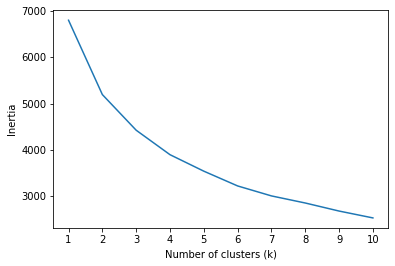

In [12]:
ks = range(1, 11)
inertias = []

for k in ks:
    model = KMeans(n_clusters = k)
    model.fit(scaled_df)
    inertias.append(model.inertia_)

plt.plot(ks, inertias)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

In [13]:
from sklearn.metrics import silhouette_score

Text(0, 0.5, 'Sil Score')

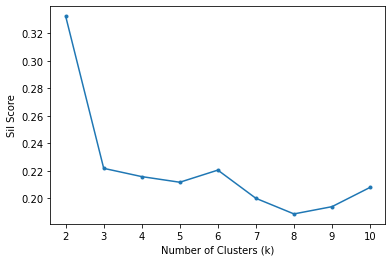

In [14]:
silhouette_scores = []
for i in range(2,11):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(scaled_df)
  silhouette_scores.append(silhouette_score(scaled_df, kmeans.labels_))
plt.plot(range(2,11), silhouette_scores, marker = '.')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Sil Score")

In [15]:
# instantiate a Kmeans model with the value for k based on elbow plot method and silhouette score
# Note that both metrics suggested 5 clusters, so that is the K value used here
km = KMeans(n_clusters = 6, random_state = 42)

In [16]:
# add a column to the dataframe to add the cluster lable as you fit and predict df
df['clusters'] = km.fit_predict(scaled_df)

In [17]:
# examine your dataframe with .head()
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,clusters
0,41,2,6,19,0.124,1.073,0.0,6.3,1
1,47,1,26,100,4.582,8.218,0.0,12.8,0
2,33,2,10,57,6.111,5.802,1.0,20.9,2
3,29,2,4,19,0.681,0.516,0.0,6.3,1
4,47,1,31,253,9.308,8.908,0.0,7.2,3


In [18]:
scale = StandardScaler()
scaled = scale.fit_transform(df)

In [19]:
silhouette_scores = []
for i in range(2,11):
 Kmean = KMeans(n_clusters=i)
 Kmean.fit(scaled)
 silhouette_scores.append(silhouette_score(scaled,Kmean .labels_))

Text(0, 0.5, 'scores')

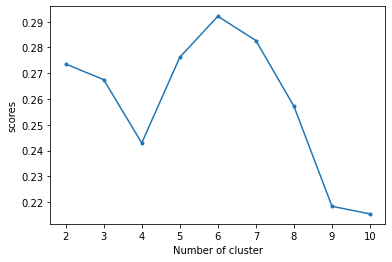

In [20]:
plt.plot(range(2,11),silhouette_scores,marker = '.')
plt.xlabel('Number of cluster')
plt.ylabel('scores')

In [21]:
km = KMeans(n_clusters=2)
km.fit(scaled)
silhouette_score(scaled,km.labels_)

0.2735933859665423

In [22]:
from sklearn.cluster import DBSCAN,AgglomerativeClustering

In [23]:
silhouette_scores1 = []
for k in range(2,11):
 db = DBSCAN(min_samples =k)
 db.fit(scaled)
 silhouette_scores1.append(silhouette_score(scaled,db .labels_))

Text(0, 0.5, 'scores')

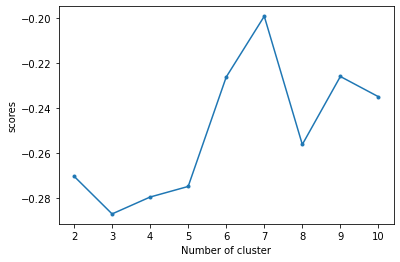

In [24]:
plt.plot(range(2,11),silhouette_scores1,marker = '.')
plt.xlabel('Number of cluster')
plt.ylabel('scores')

In [25]:
dbs = DBSCAN(eps=0.5,min_samples=7)
dbs.fit(scaled)
silhouette_score(scaled,dbs.labels_)

-0.19903733538243515

In [26]:
dbs = DBSCAN(eps = 0.5, min_samples = 7).fit(scaled)
silhouette_score(scaled, dbs.labels_)

-0.19903733538243515

In [27]:
silhouette_scores2 = []
for l in range(2,11):
 hc = AgglomerativeClustering(n_clusters=l)
 hc.fit(scaled)
 silhouette_scores2.append(silhouette_score(scaled,hc.labels_))

Text(0, 0.5, 'scores')

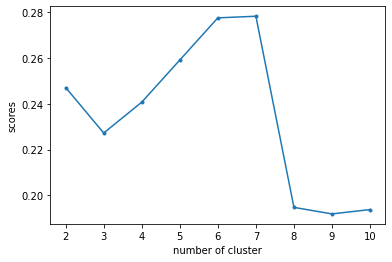

In [28]:
plt.plot(range(2,11),silhouette_scores2,marker='.')
plt.xlabel('number of cluster')
plt.ylabel('scores')

In [29]:
hcc = AgglomerativeClustering(n_clusters=2)
hcc.fit(scaled)
silhouette_score(scaled,hcc.labels_)

0.24704940167412312